In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time

from IPython.display import clear_output
import plotly.express as px

In [2]:
# os.listdir()

In [3]:
# directory = os.listdir()[1]
filename = "speedtest"  # .exe"
output_file = "test.csv"
options = f"--output-header -f csv > {output_file}"


4 2022-04-21 20:04:47.982782
Testing


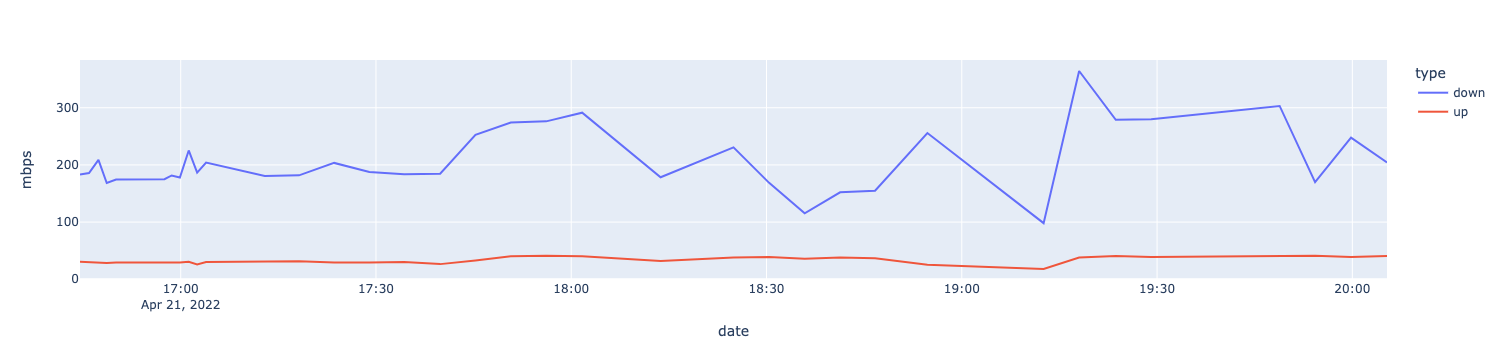

           download        upload
count  3.600000e+01  3.600000e+01
mean   2.600164e+07  4.141230e+06
std    6.904305e+06  7.292463e+05
min    1.225948e+07  2.234162e+06
25%    2.213791e+07  3.668134e+06
50%    2.326633e+07  3.861954e+06
75%    3.111902e+07  4.851113e+06
max    4.553781e+07  5.168148e+06
-- Waiting


In [ ]:
def run_speedtest(history_df):
    # import subprocess
    # returned_value = subprocess.call(f"{filename} {options}", shell=True)  # returns the exit code in unix
    # print('returned value:', returned_value)
    
    print("Testing")
    os.system(f"{filename} {options}")

    data_df = pd.read_csv(output_file)
    data_df['date'] = [dt.datetime.now()]

    # Chop the entire history file down to the columns we care about and then scale them by 8 to convert from Bps to bps
    history_df = history_df.append(data_df)

    plot_df = history_df[['date', 'download']].rename({'download': 'mbps'}, axis=1)
    plot_df["type"] = "down"
    
    upload_df = history_df[['date', 'upload']].rename({'upload': 'mbps'}, axis=1)
    upload_df["type"] = "up"
    
    plot_df = plot_df.append(upload_df)
    plot_df.loc[:, 'mbps'] *= 8 / 1e6

    fig = px.line(plot_df, x='date', y='mbps', color='type')
    fig.show()
    print(history_df[['download', 'upload']].describe())

    history_df.to_csv('history.csv', index=False)
    return history_df

try:
    history_df = pd.read_csv('history.csv')
except:
    history_df = pd.DataFrame()

wait = 5 # min
loops = int(6 * 60 / wait)
for i in range(loops):
    i += 1
    print(i, dt.datetime.now())
    history_df = run_speedtest(history_df)
    if i < loops:
        print("-- Waiting")
        clear_output(wait=True)
        time.sleep(wait * 60)


### The Buck Stops Here